In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Define paths to your train, validation and test sets
train_dir = "C:/Users/Abd ur Rehman/Desktop/brain d/Train"
val_dir = "C:/Users/Abd ur Rehman/Desktop/brain d/Validation"
test_dir = "C:/Users/Abd ur Rehman/Desktop/brain d/Test"

In [3]:
# Define image size and batch size
img_size = (224, 224)
batch_size = 32

In [4]:
# Define data generator for train, validation and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')
val_datagen = ImageDataGenerator(rescale=1./255)
val_data = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')

Found 588 images belonging to 2 classes.
Found 84 images belonging to 2 classes.
Found 168 images belonging to 2 classes.


In [6]:
# Load pre-trained VGG-16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [7]:
# Freeze pre-trained layers
for layer in vgg16_model.layers:
    layer.trainable = False

In [8]:
# Build model
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [9]:
 #Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=2, verbose=1)

Epoch 1/10
19/19 [==============================] - 352s 19s/step - loss: 0.3763 - accuracy: 0.8997 - val_loss: 37.9799 - val_accuracy: 0.0119
Epoch 2/10
19/19 [==============================] - 545s 29s/step - loss: 0.2143 - accuracy: 0.9490 - val_loss: 37.4658 - val_accuracy: 0.0238
Epoch 3/10
19/19 [==============================] - 545s 29s/step - loss: 0.1737 - accuracy: 0.9541 - val_loss: 31.6533 - val_accuracy: 0.0238
Epoch 4/10
19/19 [==============================] - 541s 29s/step - loss: 0.1264 - accuracy: 0.9524 - val_loss: 29.4937 - val_accuracy: 0.0119
Epoch 5/10
19/19 [==============================] - 1879s 103s/step - loss: 0.1733 - accuracy: 0.9490 - val_loss: 27.4492 - val_accuracy: 0.0238
Epoch 6/10
19/19 [==============================] - 554s 29s/step - loss: 0.1338 - accuracy: 0.9592 - val_loss: 25.6126 - val_accuracy: 0.0119
Epoch 7/10
19/19 [==============================] - 548s 29s/step - loss: 0.1179 - accuracy: 0.9558 - val_loss: 22.5941 - val_accuracy: 0.01

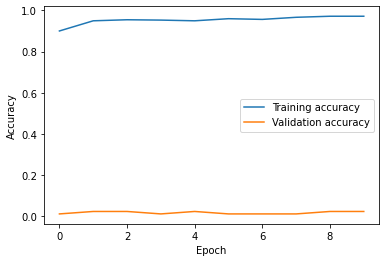

In [11]:
# Train model
history = model.fit(train_data, epochs=10, batch_size=20, validation_data=val_data)

import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)

6/6 [==============================] - 156s 25s/step - loss: 17.6308 - accuracy: 0.1726
Test accuracy: 0.1726190447807312


In [13]:
from sklearn.metrics import confusion_matrix

# Get the true labels and predictions for the test set
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred = y_pred > 0.5  # Convert probabilities to binary predictions (0 or 1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)

6/6 [==============================] - 129s 19s/step
Confusion Matrix:
[[22 78]
 [17 51]]


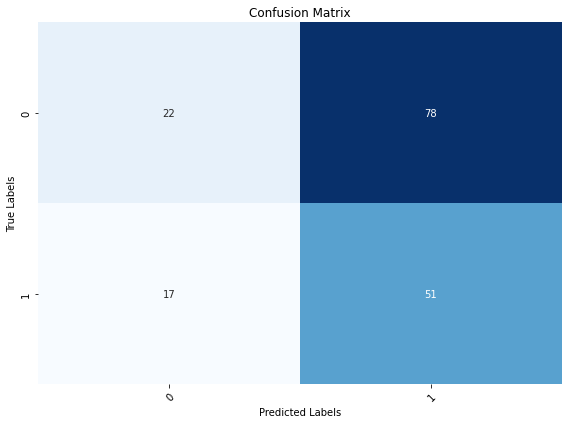

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the confusion matrix stored in the variable `cm`

# Create a list of class labels
class_labels = np.unique(y_true)

# Create a figure and axes
plt.figure(figsize=(8, 6))
ax = plt.subplot()

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Rotate tick labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Show the plot
plt.tight_layout()
plt.show()

1/1 [==============================] - 2s 2s/step
Stroke [1.]


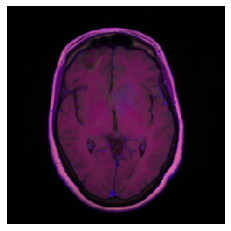

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

 #Load a test image
img_path = 'C:/Users/Abd ur Rehman/Desktop/Brain Data/Train/Stroke/tpt.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Predict the class probabilities
preds = model.predict(x)

# Print the predicted class and probability
if preds.any() > 0.5:
    print("Stroke", preds[0])
else:
    print("No Stroke", preds[0])

# Show the image with predicted label
plt.imshow(img)
plt.axis('off')
plt.show()